In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


# 유틸

In [2]:
def save_model(model_name: str, model: keras.models.Model):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)

from keras.models import model_from_json
from typing import Optional

In [3]:
def load_model(
    model_name: str, with_weights_path: Optional[str] = None
) -> keras.models.Model:
    json_file = open(model_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    if with_weights_path:
        model.load_weights(with_weights_path)
    return model

In [4]:
import os
base_gdrive_path = os.path.join("drive", "MyDrive", "deep learning example")

In [20]:
result_path = os.path.join(base_gdrive_path, "results")

# CNN Classification

## Fashion MNIST

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0               


train_labels[:20]

4423680/4422102 [==============================] - 0s 0us/step


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

## 모델

### 모델 생성

In [11]:
def cnn_classification_model():
  input = keras.layers.Input((28, 28, 1))
  flatten = keras.layers.Flatten()(input)
  dense_3 = keras.layers.Dense(10, activation='softmax')(flatten)

  return keras.models.Model(inputs=[input], outputs=[dense_3])

In [12]:
model = cnn_classification_model()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


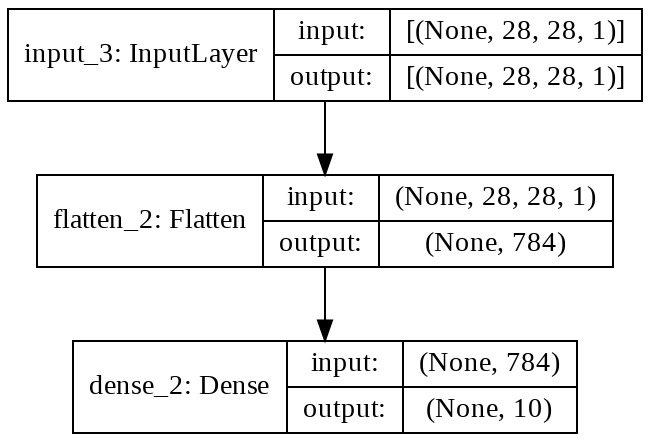

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model.png', expand_nested=True, dpi=144)

### 모델 트레이닝

In [14]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
BATCH_SIZE = 32
num_train_examples = len(train_images)

import math

history = model.fit(train_images, train_labels, epochs=10, batch_size=BATCH_SIZE, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6047 - accuracy: 0.7952
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4621 - accuracy: 0.8418
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4357 - accuracy: 0.8510
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4231 - accuracy: 0.8535
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4139 - accuracy: 0.8567
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4072 - accuracy: 0.8584
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4019 - accuracy: 0.8605
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3990 - accuracy: 0.8618
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3945 - accuracy: 0.8641
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.391

[0.7952499985694885,
 0.8417500257492065,
 0.8510000109672546,
 0.8535166382789612,
 0.8567166924476624,
 0.8583666682243347,
 0.8605333566665649,
 0.8618000149726868,
 0.8640833497047424,
 0.8634666800498962]

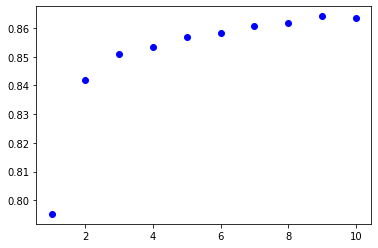

In [16]:
history_accuracy = history.history["accuracy"]

epochs = range(1, len(history_accuracy) + 1)
plt.plot(epochs, history_accuracy, "bo", label="Training accuracy")
history_accuracy

[0.6046981811523438,
 0.4621127247810364,
 0.43566617369651794,
 0.42305788397789,
 0.4138866662979126,
 0.4071800708770752,
 0.40191835165023804,
 0.39899808168411255,
 0.3945101201534271,
 0.39128875732421875]

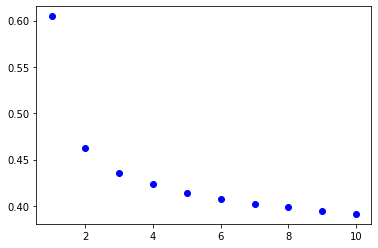

In [17]:
history_loss = history.history["loss"]

epochs = range(1, len(history_loss) + 1)
plt.plot(epochs, history_loss, "bo", label="Training loss")
history_loss

### 모델 테스트 및 예측

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.4494 - accuracy: 0.8425
테스트 정확도: 0.8424999713897705


In [22]:
save_model(os.path.join(result_path, "cnn_classification_model_000.json"), model)

import time
# run_id: str = time.strftime("%Y%m%d-%H%M%S")

run_id: str = "002"
weight_file_name: str = "cnn_classification_model_000__{}.hdf5".format(run_id)

model.save_weights(os.path.join(result_path, weight_file_name))

In [23]:
# run_id: str = "002"
# weight_file_name: str = "cnn_classification_model_000__{}.hdf5".format(run_id))

json_model_path = os.path.join(result_path, "cnn_classification_model_000.json")
model_weight_path = os.path.join(result_path, weight_file_name)
loaded_model2_with_weight = load_model(json_model_path, model_weight_path)
prediction_loaded_model2_with_weight = loaded_model2_with_weight.predict(test_images)

print("예측: {}".format(np.argmax(prediction_loaded_model2_with_weight[0])))
print(prediction_loaded_model2_with_weight[0])
print("정답 :{}".format(test_labels[0]))

예측: 9
[2.8850960e-07 2.8126308e-08 1.7293061e-05 7.2946791e-06 5.9323197e-06
 1.6853465e-01 4.5348603e-05 8.6870432e-02 1.1969008e-02 7.3254973e-01]
정답 :9
